# RFM

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahdi-ebrahimi-per/AI/tree/main/7-%20RFM/RFM%20on%20real%20data%20set)


### Import Packages 

In [1]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import seaborn as sns



### Load Data

In [2]:
DataSet_Path = r"C:\Users\asus\Desktop\MAHDI,Central\Programming\github\Repositories\AI\7- RFM\RFM on test data set\Train.xlsx"
Sales_DataSet = pd.read_excel(DataSet_Path)
Sales_DataSet = Sales_DataSet.iloc[:,:5] # ignore 'Suspicious' column
# Sales_DataSet.head()
Sales_DataSet.shape

(42582, 5)

| SalesPersonID | ClusterSumOfQuantity | ClusterValue | 
| --- | --- | --- |
| C21116 | ? | ? |

### Unique Value

In [3]:
unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "Unique Value"]

for column in Sales_DataSet.columns:
    count = Sales_DataSet[column].nunique()
    unique_counts.add_row([column, count])


print(unique_counts)    


+-----------------+--------------+
|     Feature     | Unique Value |
+-----------------+--------------+
|     ReportID    |    42582     |
|  SalesPersonID  |     992      |
|    ProductID    |     593      |
|     Quantity    |     6493     |
| TotalSalesValue |     7665     |
+-----------------+--------------+


### Sellers per Quantity
    - Total number of sales of a particular Seller
    - Ranking the Sellers, and show top 10 of them in bar chart

1829


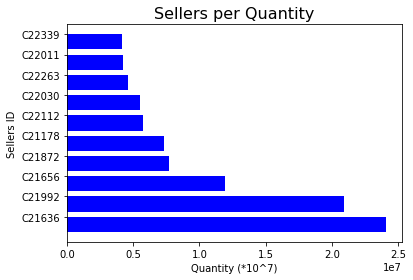

In [4]:

salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

SalesPersonID_per_Quantity = Sales_DataSet[["Quantity", "SalesPersonID"]]


QuantitySum_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantitySum_unique_forEachSalesPerson.append(sum(ListOfQuantityOfPerson))
    
    
    
# Total number of sales of a particular Seller
SellerID = "C21116" 
UniqueSalesPersonID_per_SumOfQuantity = dict(zip(salesPerson_unique, QuantitySum_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_SumOfQuantity[SellerID])


# print(UniqueSalesPersonID_per_SumOfQuantity)

# Ranking of Sellers
Top10_Sellers = sorted(UniqueSalesPersonID_per_SumOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
SellersPerQuantity_keys, SellersPerQuantity_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

# print(SellersPerQuantity_values[:10])

fig, ax = plt.subplots()    
plt.style.use('Solarize_Light2')
width = 0.75 
ind = np.arange(len(SellersPerQuantity_values))
ax.barh(ind, SellersPerQuantity_values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(SellersPerQuantity_keys, minor=False)
plt.title('Sellers per Quantity')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Sellers ID')
plt.show()



### Seller per TotalSalesValue

24080


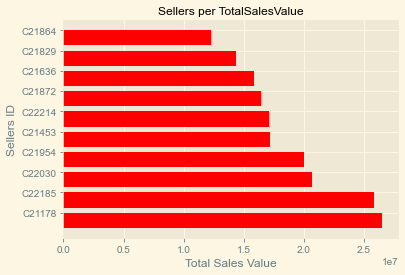

In [5]:

salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

SalesPersonID_per_TotalSalesValue = Sales_DataSet[["TotalSalesValue", "SalesPersonID"]]


TotalSalesValueSum_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityOfPerson = SalesPersonID_per_TotalSalesValue["TotalSalesValue"][(SalesPersonID_per_TotalSalesValue["SalesPersonID"]==Person)]
    
    TotalSalesValueSum_unique_forEachSalesPerson.append(sum(ListOfQuantityOfPerson))
    
    
    
# Total number of sales of a particular Seller
SellerID = "C21116" 
UniqueSalesPersonID_per_SumOfTotalSalesValue = dict(zip(salesPerson_unique, TotalSalesValueSum_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_SumOfTotalSalesValue[SellerID])


# print(UniqueSalesPersonID_per_SumOfTotalSalesValue)

# Ranking of Sellers
Top10_Sellers = sorted(UniqueSalesPersonID_per_SumOfTotalSalesValue.items(), key=lambda user:user[1], reverse=True)[:10]
SellersPerTotalSalesValue_keys, SellersPerTotalSalesValue_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

# print(SellersPerQuantity_values[:10])

fig, ax = plt.subplots()    
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(SellersPerTotalSalesValue_values))
ax.barh(ind, SellersPerTotalSalesValue_values, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(SellersPerTotalSalesValue_keys, minor=False)
plt.title('Sellers per TotalSalesValue')
plt.xlabel('Total Sales Value')
plt.ylabel('Sellers ID')
plt.show()



### 

### Most Popular Products

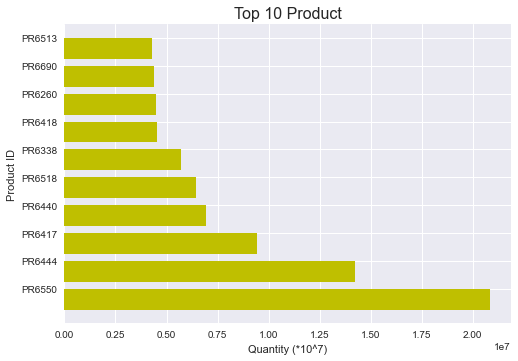

In [6]:
ProductID_unique = list(Sales_DataSet.ProductID.unique())

ProductID_per_Quantity = Sales_DataSet[["Quantity", "ProductID"]]


QuantitySum_unique_forEachProductID = []
for Product in ProductID_unique:
        
    ListOfQuantityOfProduct = ProductID_per_Quantity["Quantity"][(ProductID_per_Quantity["ProductID"]==Product)]
    
    QuantitySum_unique_forEachProductID.append(sum(ListOfQuantityOfProduct))
        
    
# Total number of sales of a particular Product
ProductID = "PR6112" 
UniqueProduct_per_SumOfQuantity = dict(zip(ProductID_unique, QuantitySum_unique_forEachProductID))
# print(UniqueProduct_per_SumOfQuantity[ProductID])



# Ranking of Sellers
Top10_Product = sorted(UniqueProduct_per_SumOfQuantity.items(), key=lambda product:product[1], reverse=True)[:10]
MostPopularProducts_keys, MostPopularProducts_values = [ i for i, j in Top10_Product], [ j for i, j in Top10_Product]

fig, ax = plt.subplots()    
plt.style.use('Solarize_Light2')
width = 0.75 
ind = np.arange(len(MostPopularProducts_values))
ax.barh(ind, MostPopularProducts_values, width, color="y")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(MostPopularProducts_keys, minor=False)
plt.title('Top 10 Product')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Product ID')
plt.show()



### Most Trend Buying Number (NOT COMPLITED)

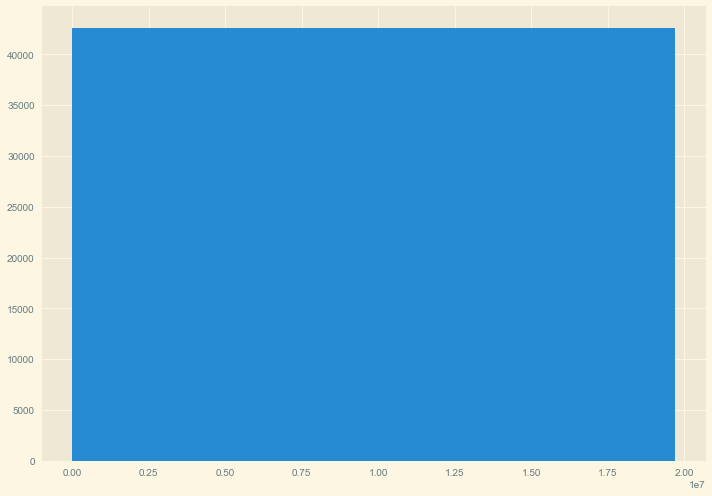

In [7]:

# y = .8 ** x + np.random.randn(10000) + 25

fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

n_bins = 1
axs.hist(Sales_DataSet["Quantity"], bins = n_bins)

# Show plot
plt.show()


### Number of product selling by seller

10


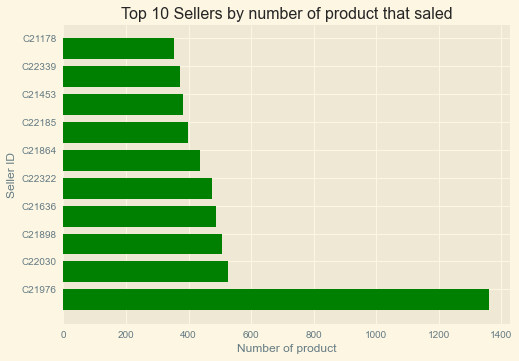

In [8]:
salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

QuantityCount_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityCountOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantityCount_unique_forEachSalesPerson.append(len(ListOfQuantityCountOfPerson))
    

# print(QuantityCount_unique_forEachSalesPerson)






# Number of product selling by particular seller
SellerID = "C21116" 
UniqueSalesPersonID_per_CountOfQuantity = dict(zip(salesPerson_unique, QuantityCount_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_CountOfQuantity[SellerID])




# Ranking of Sellers by number of product that saled
Top10_Sellers = sorted(UniqueSalesPersonID_per_CountOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
NumberOfProduct_keys, NumberOfProduct_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

fig, ax = plt.subplots()    
plt.style.use('Solarize_Light2')
width = 0.75 
ind = np.arange(len(NumberOfProduct_values))
ax.barh(ind, NumberOfProduct_values, width, color="Green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(NumberOfProduct_keys, minor=False)
plt.title('Top 10 Sellers by number of product that saled')
plt.xlabel('Number of product')
plt.ylabel('Seller ID')
plt.show()


### Clustering and get sellers into group (Per Sum Of Quantity)
    - 3 cluster for KMeans and 2 cluster for outlier, 5 cluster in total
        - first outliar cluster (4) : x>IQR
        - secend outliar cluster (5) : x>IQR+Q3
    
    - Table of Clustering of each SalesPerson (unique_Clusters_SumOfQuantityPerSalesPersion)

In [9]:
def getOut_Outliar_Cluster4_Cluster5(Data, ColumnIndex): # output -> ReducedDataSet, Cluster4, CLuster5
    Data = pd.DataFrame(Data) if type(Data)==list  else None
    Q1 = Data[ColumnIndex].describe()["25%"]
    Q3 = Data[ColumnIndex].describe()["75%"]
    IQR = Q3 - Q1
    
    outliers_withIndex_Cluster4 = dict()     
    outliers_withIndex_Cluster5 = dict()     
    
    #Cluster 4
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(68028) and i < 139768:
            outliers_withIndex_Cluster4[index] = i
                        
        index += 1


    #Cluster 5
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(139768):
            outliers_withIndex_Cluster5[index] = i
                        
        index += 1
    
    #ReducedDataSet with out outliar
    QuantitySum_unique_forEachSalesPerson_withOutOutliar = Data
    Cluster4_outliarIndexes = list(outliers_withIndex_Cluster4.keys())
    Cluster5_outliarIndexes = list(outliers_withIndex_Cluster5.keys())
    allIndexesOfoutliars = Cluster4_outliarIndexes + Cluster5_outliarIndexes

    QuantitySum_unique_forEachSalesPerson_withOutOutliar = np.delete(np.array(QuantitySum_unique_forEachSalesPerson_withOutOutliar), allIndexesOfoutliars)
    
    return (QuantitySum_unique_forEachSalesPerson_withOutOutliar), outliers_withIndex_Cluster4, outliers_withIndex_Cluster5
    
    


def NumberOfEachLabel(Model_labels) -> dict:
    
    keys = ("1", "2", "3")
    value = 0
    
    res = dict.fromkeys(keys, value)    
    
    for i in Model_labels:
        if i == 0 : res["1"] += 1
        
        elif i == 1 :res["2"] += 1
        
        elif i == 2 :res["3"] += 1
    
    return res




ReducedDataSet, Cluster4, Cluster5 = getOut_Outliar_Cluster4_Cluster5(QuantitySum_unique_forEachSalesPerson, 0)


model = KMeans(n_clusters=3, random_state=0)
model = model.fit(scale(ReducedDataSet).reshape(-1,1))
# print(model.labels_)
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3)


print(NumberOfEachLabel(lut[model.labels_])) #1, 2, 3
print(f"Len Cluster 4 : {len(Cluster4)}") # 4
print(f"Len Cluster 5 : {len(Cluster5)}") # 5


ReducedDataSet = np.array(ReducedDataSet)

# Cluster of particular seller
def ClusterOfParticularSeller_perQuantity():
    dictKeys = salesPerson_unique
    dictValues = []
    index_balancer = 0
    for i in range(992):
        if i in list(Cluster4.keys()):
            dictValues.append(4)
            
        elif i in list(Cluster5.keys()):
            dictValues.append(5)
        
        else:
            dictValues.append(model.labels_[index_balancer])
            index_balancer += 1
            
    
    return dict(zip(dictKeys, dictValues))



Clusterd_SalesPersons = ClusterOfParticularSeller_perQuantity()
# print( Clusterd_SalesPersons["C21167"] )
# print( Clusterd_SalesPersons[salesPerson_unique[16]] )
unique_Clusters_SumOfQuantityPerSalesPersion = list(Clusterd_SalesPersons.values())
    



{'1': 478, '2': 174, '3': 86}
Len Cluster 4 : 99
Len Cluster 5 : 155


### Clustering and get sellers into group (Per Total Sales Value)
    #- 3 cluster for KMeans and 2 cluster for outlier, 5 cluster in total
        - first outliar cluster (4) : x>IQR
        - secend outliar cluster (5) : x>IQR+(2*Q3)
    
    #- Table of Clustering of each SalesPerson (unique_Clusters_TotalSalesPerSalesPersion)

In [10]:
def getOut_Outliar_Cluster4_Cluster5(Data, ColumnIndex): # output -> ReducedDataSet, Cluster4, CLuster5
    Data = pd.DataFrame(Data) if type(Data)==list  else None
    Q1 = Data[ColumnIndex].describe()["25%"]
    Q3 = Data[ColumnIndex].describe()["75%"]
    IQR = Q3 - Q1
    
    outliers_withIndex_Cluster4 = dict()     
    outliers_withIndex_Cluster5 = dict()     
    
    
    #Cluster 4
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(IQR) and i < int(IQR+(2*Q3)):
            outliers_withIndex_Cluster4[index] = i
                        
        index += 1


    #Cluster 5
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(IQR+(2*Q3)):
            outliers_withIndex_Cluster5[index] = i
                        
        index += 1
    
    #ReducedDataSet with out outliar
    QuantitySum_unique_forEachSalesPerson_withOutOutliar = Data
    Cluster4_outliarIndexes = list(outliers_withIndex_Cluster4.keys())
    Cluster5_outliarIndexes = list(outliers_withIndex_Cluster5.keys())
    allIndexesOfoutliars = Cluster4_outliarIndexes + Cluster5_outliarIndexes

    QuantitySum_unique_forEachSalesPerson_withOutOutliar = np.delete(np.array(QuantitySum_unique_forEachSalesPerson_withOutOutliar), allIndexesOfoutliars)
    
    return (QuantitySum_unique_forEachSalesPerson_withOutOutliar), outliers_withIndex_Cluster4, outliers_withIndex_Cluster5
    
    


def NumberOfEachLabel(Model_labels) -> dict:
    
    keys = ("1", "2", "3")
    value = 0
    
    res = dict.fromkeys(keys, value)    
    for i in Model_labels:
        if i == 0 : res["1"] += 1
        
        elif i == 1 :res["2"] += 1
        
        elif i == 2 :res["3"] += 1
    
    return res



ReducedDataSet, Cluster4, Cluster5 = getOut_Outliar_Cluster4_Cluster5(TotalSalesValueSum_unique_forEachSalesPerson, 0)


model = KMeans(n_clusters=3, random_state=0)
model = model.fit(scale(ReducedDataSet).reshape(-1,1))
# print(model.labels_)
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3)


print(NumberOfEachLabel(lut[model.labels_])) #1, 2, 3
print(f"Len Cluster 4 : {len(Cluster4)}") # 4
print(f"Len Cluster 5 : {len(Cluster5)}") # 5


ReducedDataSet = np.array(ReducedDataSet)

# Cluster of particular seller
def ClusterOfParticularSeller_perQuantity():
    dictKeys = salesPerson_unique
    dictValues = []
    index_balancer = 0
    for i in range(992):
        if i in list(Cluster4.keys()):
            dictValues.append(4)
            
        elif i in list(Cluster5.keys()):
            dictValues.append(5)
        
        else:
            dictValues.append(model.labels_[index_balancer])
            index_balancer += 1
            
    
    return dict(zip(dictKeys, dictValues))



Clusterd_SalesPersons = ClusterOfParticularSeller_perQuantity()
# print( Clusterd_SalesPersons["C21167"] )
# print( Clusterd_SalesPersons[salesPerson_unique[16]] )
unique_Clusters_TotalSalesPerSalesPersion = list(Clusterd_SalesPersons.values())


\




{'1': 395, '2': 204, '3': 127}
Len Cluster 4 : 165
Len Cluster 5 : 101


### Make Table of Clustering per SalesPersons

In [11]:
salesPerson_unique = np.array(salesPerson_unique)
unique_Clusters_TotalSalesPerSalesPersion = np.array(unique_Clusters_TotalSalesPerSalesPersion)
unique_Clusters_SumOfQuantityPerSalesPersion = np.array(unique_Clusters_SumOfQuantityPerSalesPersion)

Table = np.c_[salesPerson_unique, unique_Clusters_SumOfQuantityPerSalesPersion, unique_Clusters_TotalSalesPerSalesPersion]
print(Table)


[['C21116' '0' '0']
 ['C21918' '0' '0']
 ['C22276' '2' '1']
 ...
 ['C22001' '1' '2']
 ['C21625' '5' '5']
 ['C22284' '5' '4']]


In [12]:

Index= ['0', '1', '2']
Cols = ['0', '1', '2']

row0 = [0, 0, 0]
row1 = [0, 0, 0]
row2 = [0, 0, 0]


for saler in Table:
    if int(saler[1]) == 0 and int(saler[2]) == 0:
        row0[0] += 1
    
    elif int(saler[1]) == 0 and int(saler[2]) == 1:
        row0[1] += 1
    
    elif int(saler[1]) == 0 and int(saler[2]) == 2:
        row0[2] += 1
    
    

    elif int(saler[1]) == 1 and int(saler[2]) == 0:
        row1[0] += 1
    
    elif int(saler[1]) == 1 and int(saler[2]) == 1:
        row1[1] += 1
    
    elif int(saler[1]) == 1 and int(saler[2]) == 2:
        row1[2] += 1
        
        
    
    elif int(saler[1]) == 2 and int(saler[2]) == 0:
        row2[0] += 1
    
    elif int(saler[1]) == 2 and int(saler[2]) == 1:
        row2[1] += 1
    
    elif int(saler[1]) == 2 and int(saler[2]) == 2:
        row2[2] += 1


df = pd.DataFrame([ row0, row1, row2 ], index=Index, columns=Cols)

# df = pd.DataFrame(tb , index=Index, columns=Cols)
df.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '100px'})

,0,1,2
0,348,25,100
1,5,31,25
2,34,34,66
